In [1]:
import pandas as pd

In [22]:
df = pd.read_excel('https://www.eia.gov/totalenergy/data/browser/xls.php?tbl=T07.06', skiprows=10)
df = df.drop(0).set_index('Month')
df = df.groupby(df.index.year).sum()
df.index.name = 'year'
df = df[(df.index < 2020)].copy()

In [27]:
cols = ['residential', 'commercial', 'industrial']
df = df.rename(columns={f"Electricity Retail Sales to the {col.title()} Sector": col for col in cols})[cols]

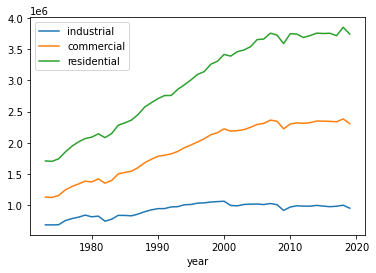

In [37]:
df[reversed(cols)].plot(stacked=True);

In [42]:
df_tot = df.assign(total=df.sum(axis=1))
((df_tot.loc[2019] - df_tot.loc[2010]) / df_tot.loc[2010] * 100).round(1)

residential   -0.7
commercial     1.8
industrial    -2.0
total         -0.1
dtype: float64